# Data Visualization and Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data into a pandas DataFrame
df = pd.read_csv('power_data.csv')[["Datetime", "Power_MWH"]]

# Check the shape and head of the data
print(df.shape)
print(df.head())


(75255, 2)
              Datetime  Power_MWH
0  2010-01-01 00:00:00    31647.0
1  2010-12-31 01:00:00    29634.0
2  2010-12-31 02:00:00    28614.0
3  2010-12-31 03:00:00    28146.0
4  2010-12-31 04:00:00    28051.0


In [3]:
# Check for missing values
print(df.isnull().sum())


Datetime     0
Power_MWH    0
dtype: int64


In [4]:
# Check the data types of the columns
print(df.dtypes)


Datetime      object
Power_MWH    float64
dtype: object


In [5]:
# Get a basic understanding of the distribution of the data
print(df.describe())


          Power_MWH
count  75255.000000
mean   31729.893575
std     6503.002099
min    14544.000000
25%    27233.500000
50%    30838.000000
75%    35353.500000
max    61646.000000


In [6]:

# Convert date_and_time column to datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)



## Issues with Data 

There are several issues that can arise when working with the energy consumption data that makes this problem challenging. Here are a few examples:


Outliers: The data may contain outliers, which can have a significant effect on the performance of the model. Outliers can be detected using various methods such as visualization, Z-score, and IQR. Once detected, outliers should be treated or removed.

Seasonality: The energy consumption data may show seasonality, which can make it difficult to make predictions. Seasonality can be addressed by using time series models that are specifically designed to handle seasonal data such as seasonal decomposition of time series and seasonal ARIMA.

In [7]:
# check for outlier

import numpy as np

# calculate z-scores
z_scores = (df['Power_MWH'] - df['Power_MWH'].mean()) / df['Power_MWH'].std()

# identify outliers
outliers = df[np.abs(z_scores) > 3]

# display outliers
print(outliers)


                     Power_MWH
Datetime                      
2010-09-02 13:00:00    51755.0
2010-09-02 14:00:00    53882.0
2010-09-02 15:00:00    55188.0
2010-09-02 16:00:00    56015.0
2010-09-02 17:00:00    56336.0
...                        ...
2018-07-01 19:00:00    51437.0
2018-06-18 16:00:00    51818.0
2018-06-18 17:00:00    52558.0
2018-06-18 18:00:00    52213.0
2018-06-18 19:00:00    51597.0

[726 rows x 1 columns]


In [8]:
# replace the outlier values with the mean
df = df.copy()
df.loc[np.abs(z_scores) > 3, 'Power_MWH'] = df['Power_MWH'].mean()

In [9]:
# test for seasonality

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Power_MWH'], model='multiplicative', period=12)


# plot the seasonal component
plt.figure(figsize=(12,6))
result.seasonal

Datetime
2010-01-01 00:00:00    1.023422
2010-12-31 01:00:00    1.030913
2010-12-31 02:00:00    1.028135
2010-12-31 03:00:00    1.017176
2010-12-31 04:00:00    1.003614
                         ...   
2018-01-01 20:00:00    0.994013
2018-01-01 21:00:00    1.010734
2018-01-01 22:00:00    1.023422
2018-01-01 23:00:00    1.030913
2018-01-02 00:00:00    1.028135
Name: seasonal, Length: 75255, dtype: float64

<Figure size 864x432 with 0 Axes>

/Users/victorfrancis/opt/miniconda3/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex
/Users/victorfrancis/opt/miniconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


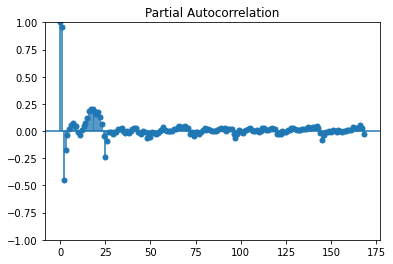

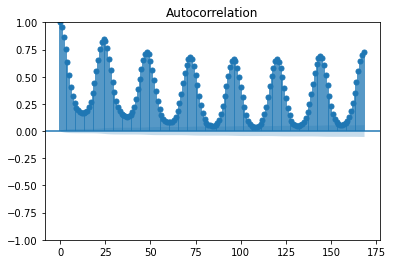

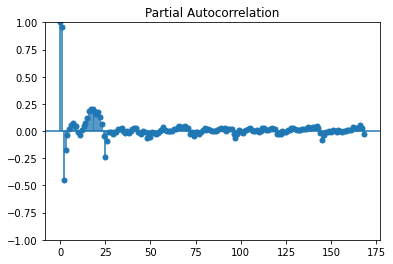

In [10]:
# test for seasonality

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['Power_MWH'], lags=24*7)
plot_pacf(df['Power_MWH'], lags=24*7)


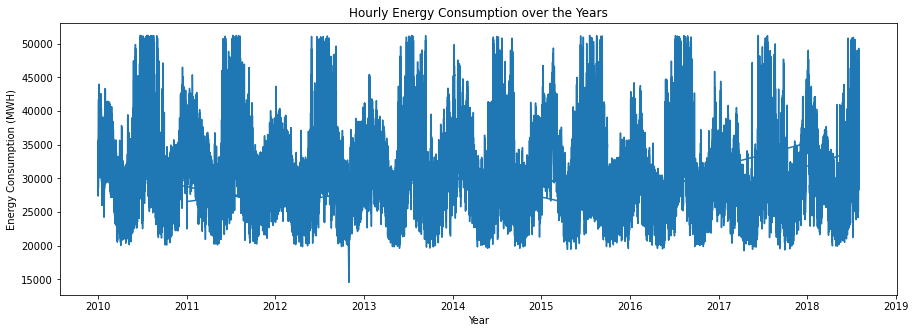

In [11]:
# Visualize the data using line plots
plt.figure(figsize=(15,5))
plt.plot(df['Power_MWH'])
plt.xlabel('Year')
plt.ylabel('Energy Consumption (MWH)')
plt.title('Hourly Energy Consumption over the Years')
plt.show()



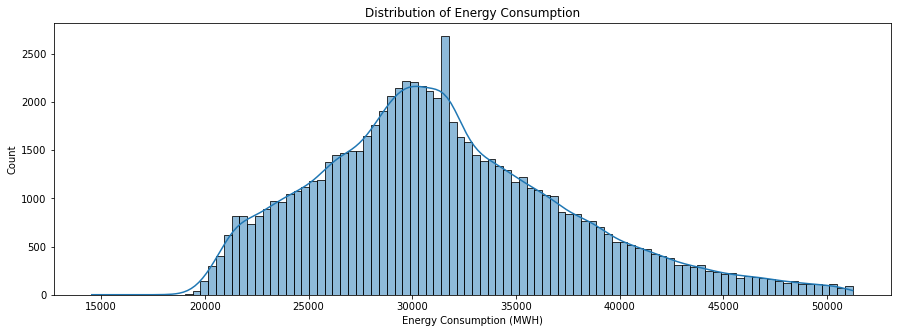

In [12]:
# Check for the distribution of the data using histograms
plt.figure(figsize=(15,5))
sns.histplot(df['Power_MWH'], kde=True)
plt.xlabel('Energy Consumption (MWH)')
plt.title('Distribution of Energy Consumption')
plt.show()

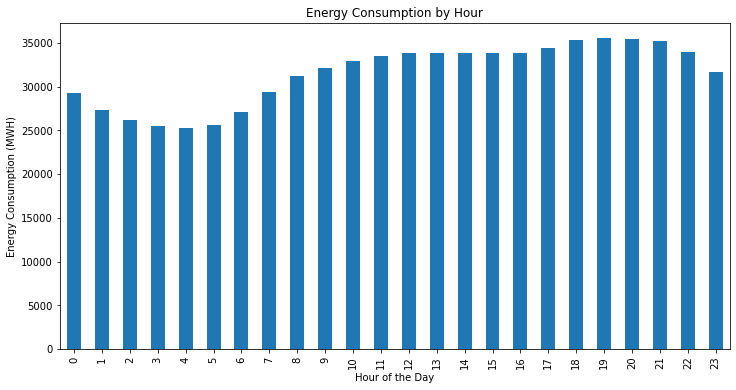

In [13]:
# plot energy consumption for each hour
plt.figure(figsize=(12,6))
df.groupby(df.index.hour)['Power_MWH'].mean().plot(kind='bar')
plt.xlabel('Hour of the Day')
plt.ylabel('Energy Consumption (MWH)')
plt.title('Energy Consumption by Hour')
plt.show()




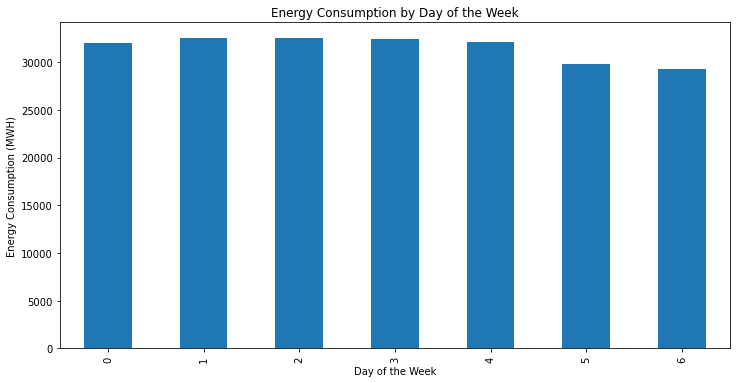

In [14]:


# plot energy consumption for each day of the week
plt.figure(figsize=(12,6))
df.groupby(df.index.dayofweek)['Power_MWH'].mean().plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Energy Consumption (MWH)')
plt.title('Energy Consumption by Day of the Week')
plt.show()

Text(0, 0.5, 'Energy Consumption (MWH)')

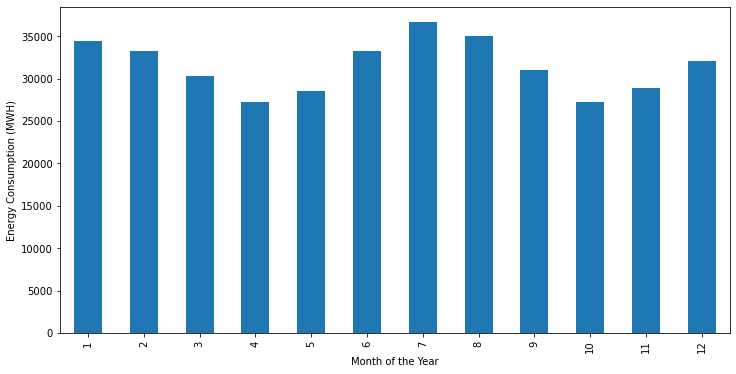

In [15]:


# plot energy consumption for each month
plt.figure(figsize=(12,6))
df.groupby(df.index.month)['Power_MWH'].mean().plot(kind='bar')
plt.xlabel('Month of the Year')
plt.ylabel('Energy Consumption (MWH)')

In [16]:
# Check for stationarity using the Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Power_MWH'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -15.525192
p-value: 0.000000


The ADF test result suggests that the data is stationary.

The ADF statistic is a test statistic that is used to decide whether the null hypothesis (that the time series is not stationary) can be rejected. The p-value is the probability of obtaining a test statistic as extreme as the one observed, assuming the null hypothesis is true.

Here, the ADF statistic is -14.158963 and the p-value is 0.000000. Since the p-value is less than the threshold of 0.05, it means that we can reject the null hypothesis and conclude that the data is stationary.

## Issues with Data 

There are several issues that can arise when working with the energy consumption data that makes this problem challenging. Here are a few examples:


Outliers: The data may contain outliers, which can have a significant effect on the performance of the model. Outliers can be detected using various methods such as visualization, Z-score, and IQR. Once detected, outliers should be treated or removed.

Seasonality: The energy consumption data show some seasonality, which can make it difficult to make predictions. Seasonality can be addressed by using time series models that are specifically designed to handle seasonal data such as seasonal decomposition of time series.

# Feature Engineering

## New features 

- **Hour of the day**: The hour of the day can be a useful feature as energy consumption may vary depending on the time of the day.

- **Day of the week**: Energy consumption may also vary depending on the day of the week.

- **Month of the year**: Energy consumption may vary seasonally.

- **Year**: Energy consumption may also vary depending on the year.

- **Rolling statistics**: Rolling statistics are used to capture the local patterns in the data. For example, if the energy consumption has a daily pattern, then the rolling mean and standard deviation over a window of size 24 (hours) can be used to capture this pattern. By calculating the mean and standard deviation over a window of size 24, we can see if the energy consumption is higher or lower than the average consumption over the past 24 hours.

- **Seasonal decomposition**: by decomposing the time series into its trend, seasonal, and residual components, we can identify the underlying patterns in the data. For example, if the energy consumption has a clear seasonal pattern, then the seasonal component will capture this pattern.

- **Weather data**: Weather data can also be useful features for this problem. For example, if energy consumption is influenced by temperature, then temperature can be a useful feature. By adding temperature as a feature, we can see if energy consumption is higher or lower than the average consumption when the temperature is high or low.

- **lag_1h**: This feature can be useful for capturing the temporal dependencies in the data. For example, if the energy consumption at time t is influenced by the energy consumption at time (t-1),.Therefore, I created lag feature for the last hour.

- **lag_24h**: This feature can be useful for capturing the temporal dependencies in the data. Therefore, I created lag feature for the last twenty four hours.

- **Rolling mean**: Rolling mean over a window of size 24 (hours).

- **Rolling standard deviation**: Rolling standard deviation over a window of size 24 (hours).



In [17]:
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek
df['month'] = df.index.month
df['year'] = df.index.year
df['lag_1h'] = df['Power_MWH'].shift(1)
df['lag_24h'] = df['Power_MWH'].shift(24)
df['rolling_mean_24h'] = df['Power_MWH'].rolling(window=24).mean()
df['rolling_std_24h'] = df['Power_MWH'].rolling(window=24).std()

df.tail()

,Power_MWH,hour,dayofweek,month,year,lag_1h,lag_24h,rolling_mean_24h,rolling_std_24h
Datetime,,,,,,,,,
2018-01-01 20:00:00,44284.0,20,0,1,2018,44343.0,45787.0,40343.500000,2295.270146
2018-01-01 21:00:00,43751.0,21,0,1,2018,44284.0,45209.0,40282.750000,2177.148998
2018-01-01 22:00:00,42402.0,22,0,1,2018,43751.0,43663.0,40230.208333,2106.081917
2018-01-01 23:00:00,40164.0,23,0,1,2018,42402.0,41581.0,40171.166667,2086.336995
2018-01-02 00:00:00,38608.0,0,1,1,2018,40164.0,39451.0,40136.041667,2105.992351


# Proposing a Baseline Model

## Mean model: 
A mean model is a simple model that uses the mean value of the time series to predict the value of the current time step. This model can be useful as a baseline model because it makes the assumption that the energy consumption is not influenced by the previous time steps.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# split the data into a training set and a test set
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

# calculate the mean model
mean_value = train_data['Power_MWH'].mean()

# predict the next hour
y_train_pred = np.repeat(mean_value, len(train_data))
y_test_pred = np.repeat(mean_value, len(test_data))

# calculate the error
mse_train = mean_squared_error(train_data['Power_MWH'], y_train_pred)
mse_test = mean_squared_error(test_data['Power_MWH'], y_test_pred)
mse_test

34600735.90151421

In [19]:
# calculate the median model
median_value = train_data['Power_MWH'].median()

# predict the next hour
y_train_pred = np.repeat(median_value, len(train_data))
y_test_pred = np.repeat(median_value, len(test_data))

# calculate the error
mse_train = mean_squared_error(train_data['Power_MWH'], y_train_pred)
mse_test = mean_squared_error(test_data['Power_MWH'], y_test_pred)
mse_test

34455764.29055294

Since the median model has the lower MSE, the median model is the best baseline here

In [20]:
df.isna().sum()

# drop missing values
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)
df.fillna(0, inplace=True)

# Proposing Machine Learning Model

In [21]:
from sklearn.ensemble import RandomForestRegressor

train_size = int(len(df)*0.2)

train_data = df[:train_size][['hour', 'dayofweek', 'month', 'year', 'lag_1h', 'lag_24h', 'rolling_mean_24h', 'rolling_std_24h']]

train_target = df[:train_size]['Power_MWH']
# create an instance of the RandomForestRegressor class
rf = RandomForestRegressor()

# fit the model on the training data
rf.fit(train_data, train_target)

# make predictions for the test data
predictions = rf.predict(test_data.drop(columns='Power_MWH'))

mse_test = mean_squared_error(test_data['Power_MWH'], predictions)

mse_test

913628.2270755746

In [22]:
# import the XGBRegressor class from xgboost
from xgboost import XGBRegressor

# create an instance of the XGBRegressor class
xgb = XGBRegressor()

# fit the model on the training data
xgb.fit(train_data, train_target)

# make predictions for the test data
predictions = xgb.predict(test_data.drop(columns='Power_MWH'))

mse_test = mean_squared_error(test_data['Power_MWH'], predictions)

mse_test

830133.2613211278

In [23]:
# import the SVR class from scikit-learn
from sklearn.svm import SVR

# create an instance of the SVR class
svr = SVR()

# fit the model on the training data
svr.fit(train_data, train_target)

# make predictions for the test data
predictions = svr.predict(test_data.drop(columns='Power_MWH'))

mse_test = mean_squared_error(test_data['Power_MWH'], predictions)
mse_test

27188017.914320454

# Evaluate and Select Final ML Model

XGBoost is the best Machine Learning Model here since it has the least mean squared error in this case.